In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bitcoin = pd.read_csv('bitcoin.csv')
ethereum = pd.read_csv('ethereum.csv')
litecoin = pd.read_csv('litecoin.csv')

In [3]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2585 entries, 0 to 2584
Data columns (total 7 columns):
Date               2585 non-null object
Open               2585 non-null float64
High               2585 non-null float64
Low                2585 non-null float64
Close              2585 non-null float64
Volume             2585 non-null float64
Market Capacity    2585 non-null float64
dtypes: float64(6), object(1)
memory usage: 141.5+ KB


In [4]:
bitcoin.head()

,Date,Open,High,Low,Close,Volume,Market Capacity
0,2020-05-25,8786.11,8951.01,8719.67,8906.93,3.128816e+10,1.637605e+11
1,2020-05-24,9212.28,9288.40,8787.25,8790.37,3.251880e+10,1.616104e+11
2,2020-05-23,9185.06,9302.50,9118.11,9209.29,2.772787e+10,1.693055e+11
3,2020-05-22,9080.33,9232.94,9008.64,9182.58,2.981077e+10,1.688076e+11
4,2020-05-21,9522.74,9555.24,8869.93,9081.76,3.932616e+10,1.669480e+11


In [5]:
btc = bitcoin[bitcoin['Date'] >= '2016-01-01'] # analyze the data starting from year 2016

In [6]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1607 entries, 0 to 1606
Data columns (total 7 columns):
Date               1607 non-null object
Open               1607 non-null float64
High               1607 non-null float64
Low                1607 non-null float64
Close              1607 non-null float64
Volume             1607 non-null float64
Market Capacity    1607 non-null float64
dtypes: float64(6), object(1)
memory usage: 100.4+ KB


In [7]:
eth = ethereum[ethereum['Date'] >= '2016-01-01']

In [8]:
eth.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1607 entries, 0 to 1606
Data columns (total 7 columns):
Date               1607 non-null object
Open               1607 non-null float64
High               1607 non-null float64
Low                1607 non-null float64
Close              1607 non-null float64
Volume             1607 non-null float64
Market Capacity    1607 non-null float64
dtypes: float64(6), object(1)
memory usage: 100.4+ KB


In [9]:
ltc = litecoin[litecoin['Date'] >= '2016-01-01']

In [10]:
ltc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1607 entries, 0 to 1606
Data columns (total 7 columns):
Date               1607 non-null object
Open               1607 non-null float64
High               1607 non-null float64
Low                1607 non-null float64
Close              1607 non-null float64
Volume             1607 non-null float64
Market Capacity    1607 non-null float64
dtypes: float64(6), object(1)
memory usage: 100.4+ KB


# Extracting on closing price

In [11]:
df = pd.DataFrame({'Date':btc.Date,
                   'BTC': btc.Close,
                   'ETH': eth.Close,
                   'LTC': ltc.Close})

In [12]:
df = df[::-1].reset_index(drop=True) # sort date and reindex

In [13]:
df

,Date,BTC,ETH,LTC
0,2016-01-01,434.33,0.95,3.51
1,2016-01-02,433.44,0.94,3.50
2,2016-01-03,430.01,0.97,3.48
3,2016-01-04,433.09,0.95,3.50
4,2016-01-05,431.96,0.95,3.47
...,...,...,...,...
1602,2020-05-21,9081.76,199.88,42.74
1603,2020-05-22,9182.58,207.17,44.21
1604,2020-05-23,9209.29,208.69,44.03
1605,2020-05-24,8790.37,202.37,42.45


From year 2016 until May 2020, we can see that all three cryptocurrencies have raised on its value.

In [14]:
df.describe()

,BTC,ETH,LTC
count,1607.000000,1607.000000,1607.000000
mean,5185.770952,221.021717,56.769652
std,3905.040794,235.195058,56.903800
min,364.330000,0.940000,3.000000
25%,1001.815000,14.010000,4.205000
50%,5247.350000,174.000000,47.470000
75%,8164.350000,288.025000,74.770000
max,19497.400000,1396.420000,358.340000


The difference between the highest and the lowest Bitcoin price was about $19133.07 in 4 years.

Ethereum surged from $ 0.94 to $1396.42 at a certain point, which is an increase of 148k%.

Whereas Litecoin raised from $ 3 to $ 358.34, which is an increase of 118k%.

# Boxplot

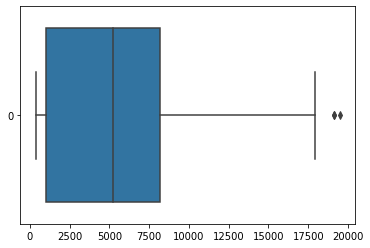

In [15]:
import seaborn as sns

box_btc = sns.boxplot(data=df['BTC'], orient="h")

The daily closing price for Bitcoin was most of the time between 1000 and 8000, price more than $ 17500 are outliers.

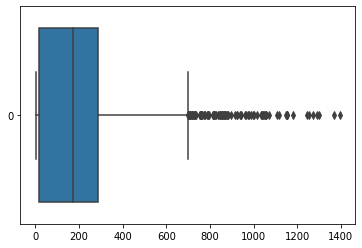

In [16]:
box_eth = sns.boxplot(data=df['ETH'], orient="h")

The daily closing price for Ethereum was most of the time between 15 and 290, price more than $ 700 are outliers.

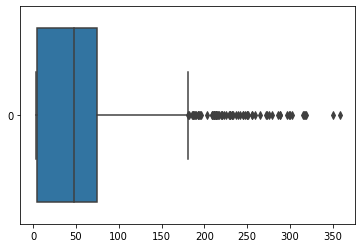

In [17]:
box_ltc = sns.boxplot(data=df['LTC'], orient="h")

The daily closing price for Litecoin was most of the time between 5 and 75, price more than $ 175 are outliers.

# Histogram

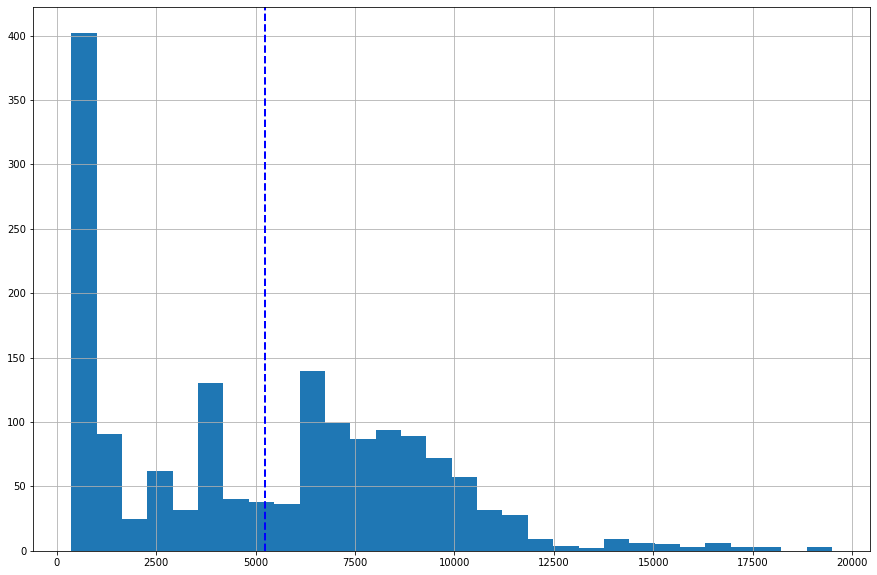

In [18]:
df['BTC'].hist(bins=30, figsize=(15,10)).axvline(df['BTC'].median(), color='b', linestyle='dashed', linewidth=2)

The closing price for Bitcoin was not more than $ 12500 for most of the days.

Blue dashed line shows that half of the closing price around $ 5250.

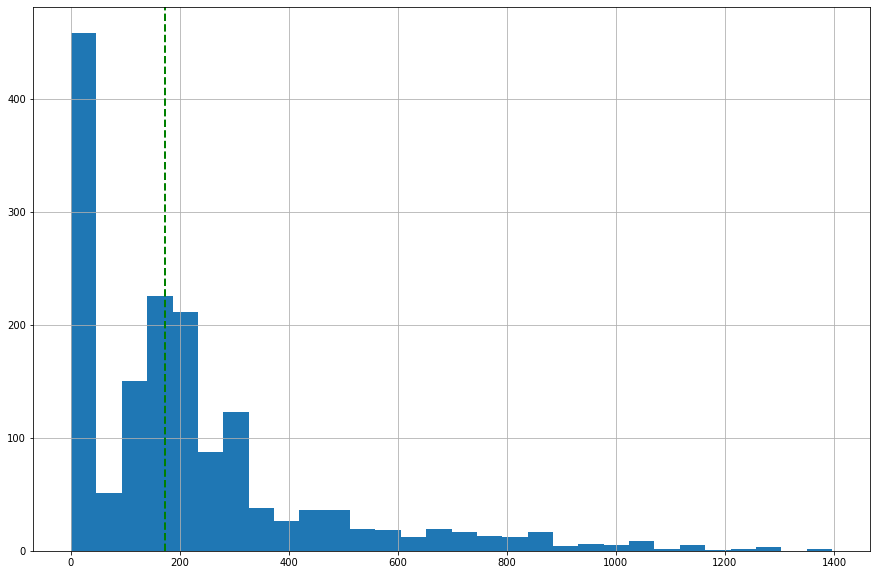

In [19]:
df['ETH'].hist(bins=30, figsize=(15,10)).axvline(df['ETH'].median(), color='g', linestyle='dashed', linewidth=2)

The closing price for Ethereum was not more than $ 900 for most of the days.

Green dashed line shows that half of the closing price around $ 180.

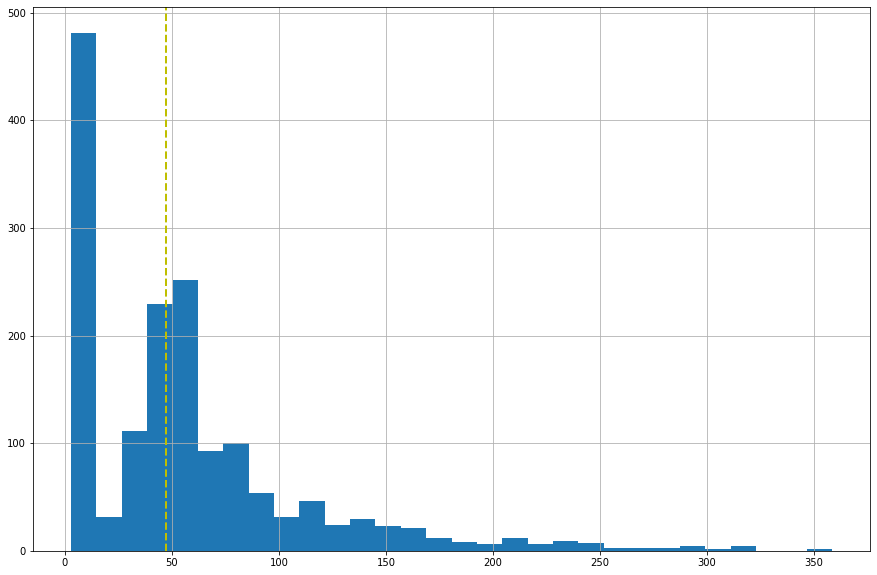

In [20]:
df['LTC'].hist(bins=30, figsize=(15,10)).axvline(df['LTC'].median(), color='y', linestyle='dashed', linewidth=2)

The closing price for Ethereum was not more than $ 250 for most of the days.

Yellow dashed line shows that half of the closing price around $ 50

# Absolute closing price

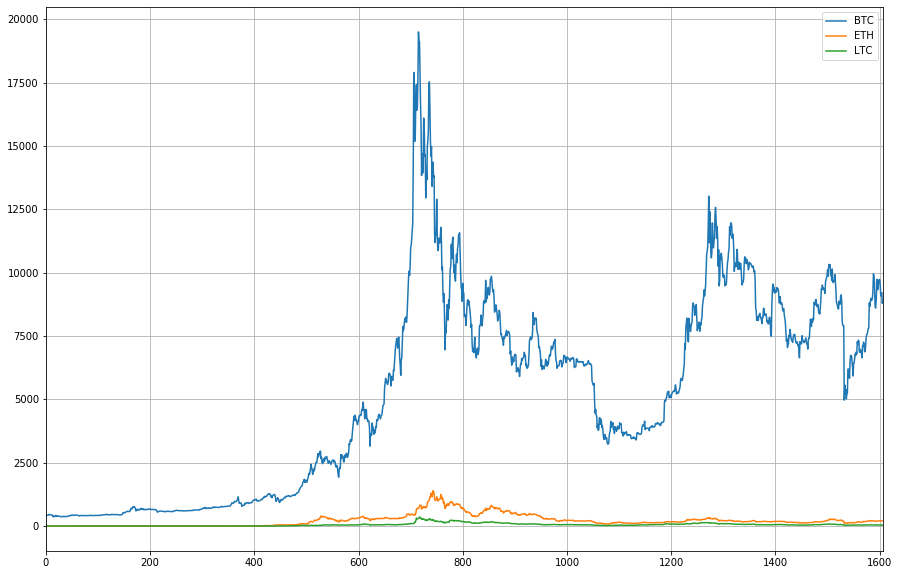

In [21]:
df.plot(grid=True, figsize=(15, 10))

Bitcoin is the most fluactuated over 4 years.

The closing price for Bitcoin is higher compared to Ethereum and Litecoin.

# Relative changes in closing prices

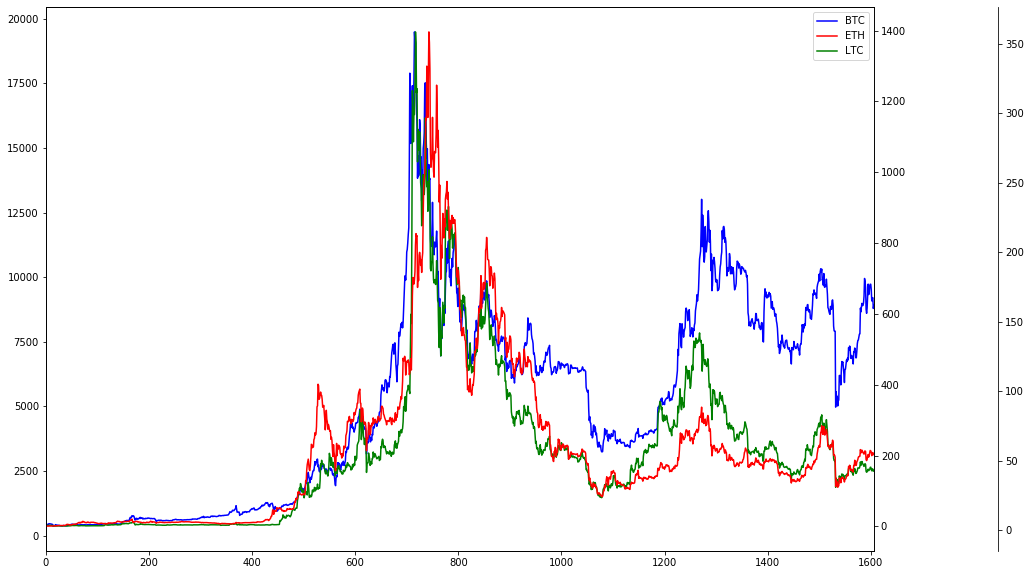

In [22]:
fig, ax1 = plt.subplots(figsize=(20, 10))
ax2 = ax1.twinx()
rspine = ax2.spines['right']
rspine.set_position(('axes', 1.15))
ax2.set_frame_on(True)
ax2.patch.set_visible(False)
fig.subplots_adjust(right=0.7)

df['BTC'].plot(ax=ax1, style='b-')
df['ETH'].plot(ax=ax1, style='r-', secondary_y=True)
df['LTC'].plot(ax=ax2, style='g-')

# legend
ax2.legend([ax1.get_lines()[0],
            ax1.right_ax.get_lines()[0],
            ax2.get_lines()[0]],
           ['BTC', 'ETH', 'LTC'])

We can see that when one cryptocurrency increased in closing price, so do the another two, and vice versa.

# Correlation

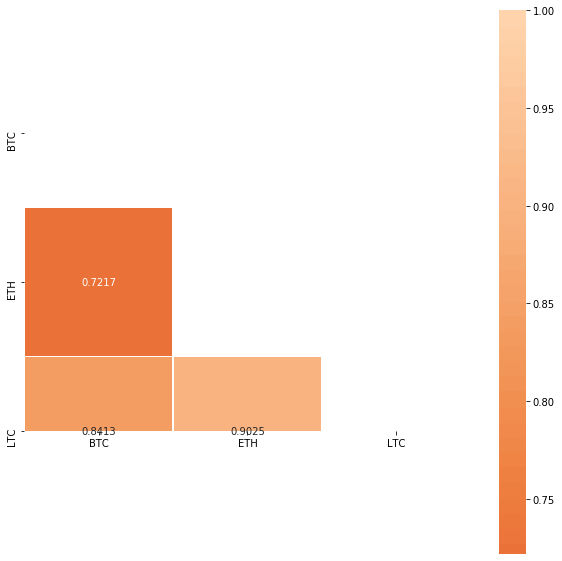

In [23]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt = '.4f', mask=mask, center=0, square=True, linewidths=.5)

Ehtereum and Litecoin are highly correlated as when ethereum is increase in price, litecoin will follow.

# Buy and hold strategy

return(t,0) = price(t) / price(0)

In [24]:
df_return = df[['BTC', 'ETH', 'LTC']].apply(lambda x: x / x[0])

In [25]:
df_return.rename(index = df['Date'])

,BTC,ETH,LTC
2016-01-01,1.000000,1.000000,1.000000
2016-01-02,0.997951,0.989474,0.997151
2016-01-03,0.990054,1.021053,0.991453
2016-01-04,0.997145,1.000000,0.997151
2016-01-05,0.994543,1.000000,0.988604
...,...,...,...
2020-05-21,20.909815,210.400000,12.176638
2020-05-22,21.141943,218.073684,12.595442
2020-05-23,21.203440,219.673684,12.544160
2020-05-24,20.238920,213.021053,12.094017


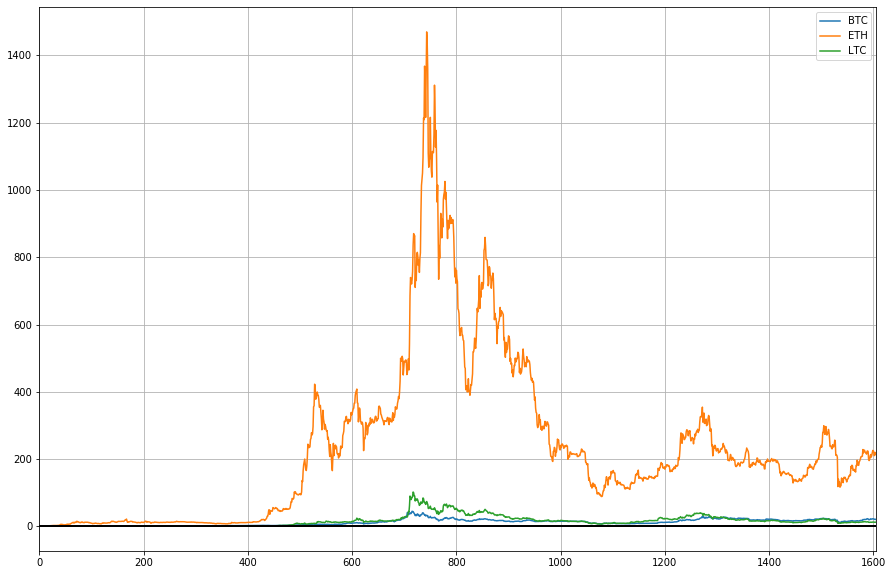

In [26]:
df_return.plot(grid=True, figsize=(15, 10)).axhline(y = 1, color = "black", lw = 2)

The most profitable period is between period 600 to 1000.